# Email Spam Detection using Supervised Learning
Austin Townsend

January 2025

CU Boulder

## Project Overview

### Project Topic
This project focuses on developing an automated email spam detection system using supervised machine learning techniques. We will implement and compare two different classification algorithms, specifically Random Forest and Support Vector Machine (SVM), to classify emails as either spam or legitimate (ham) based on their text content. This represents a clear classification problem in the realm of supervised learning.

The system will learn from a labeled dataset of emails obtained from Kaggle, where each email is already marked as either spam or ham. This is a supervised learning problem because the data is already labeled for us. By analyzing patterns in the text of known spam and ham emails, our models will learn to identify characteristics that distinguish between the two categories.

### Project Goals and Importance
Email remains one of the most crucial tools for digital communication, especially in business settings, but there is a growing distrust of emails and businesses are constantly fighting to filter spam emails. According to Statista, nearly half of all emails worldwide are spam, creating a significant barrier to effective communication and eroding user trust in email systems. This flood of unwanted messages not only wastes time and resources but also poses security risks through phishing attempts and malicious content.

Through this project, I aim to address this challenge by developing an effective spam detection system. By comparing Random Forest and SVM classifiers, I hope to identify reliable approaches for automatically filtering unwanted emails. This work will contribute to the broader effort of making email a more reliable and trustworthy communication medium.

## The Data

The dataset consists of 5,157 unique email messages with their corresponding classifications. I sourced this data from Kaggle.

### Citation
Ibrahim, A. W. (2023). Spam Emails [Dataset]. Kaggle. Retrieved from https://www.kaggle.com/datasets/abdallahwagih/spam-emails

### Data Structure
- Number of samples (rows): 5,157
- Number of features (columns): 2
- Data size: 480.13kb

### Features
1. Message (Text data):
   - Contains the full email content including subject and body
   - Unstructured text data with varying lengths
   - Contains mixed content (words, numbers, special characters)

2. Category (Categorical data):
   - Binary classification: "Spam" or "Ham" (Non-Spam)
   - Class distribution:
     * Ham: 87% (approximately 4,487 samples)
     * Spam: 13% (approximately 670 samples)
   - Notable class imbalance that will need to be addressed in our modeling approach

### Data Characteristics
- The dataset is structured in a single table format
- Text data is in English language
- No missing values in either column
- Clear class imbalance present (87/13 split)
- Raw text data will require preprocessing before model training



## Data Cleaning

Let's start by loading some core libraries and data, and examine what cleaning steps we may be able to take on the data.

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# read the data into a file variable
df = pd.read_csv('spam.csv')

print("Dataset shape:", df.shape)
print("\nMissing values:")
print(df.isnull().sum())
print("\nFirst few rows:")
print(df.head())

Dataset shape: (5572, 2)

Missing values:
Category    0
Message     0
dtype: int64

First few rows:
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


### Initial Results

So far we can see that our data contains 5,572 emails with no missing values. I'm going to continue by performing some basic cleaning steps, outlined below.

1. Remove any duplicate messages
2. Clean the text data by:
   - Converting to lowercase (to reduce dimensionality)
   - Trimming extra whitespace
3. Verify the cleaning results


In [5]:
# removing duplicates
print("Original number of rows:", len(df))
print("Number of duplicates:", df.duplicated().sum())

df = df.drop_duplicates()
print("\nNumber of rows after removing duplicates:", len(df))

Original number of rows: 5157
Number of duplicates: 0

Number of rows after removing duplicates: 5157


### Duplication Removal Results

After removing duplicates we can see that we were able to remove 415 rows. Let's continue by cleaning the remaining text data.

In [7]:
# basic text cleaning
def clean_text(text):
    text = text.lower()
    text = ' '.join(text.split())
    return text

# cleaning the message column
print("Cleaning text data...")
df['Message_Clean'] = df['Message'].apply(clean_text)

# before after for analysis
print("\nExample of cleaning results:")
print("Original:", df['Message'].iloc[0])
print("Cleaned:", df['Message_Clean'].iloc[0])

# report final number of samples (should be the same as above, 5157)
n_samples = len(df)
print(f"\nFinal number of samples: {n_samples}")

Cleaning text data...

Example of cleaning results:
Original: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Cleaned: go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...

Final number of samples: 5157


### Visualize Class Distribution After Cleaning

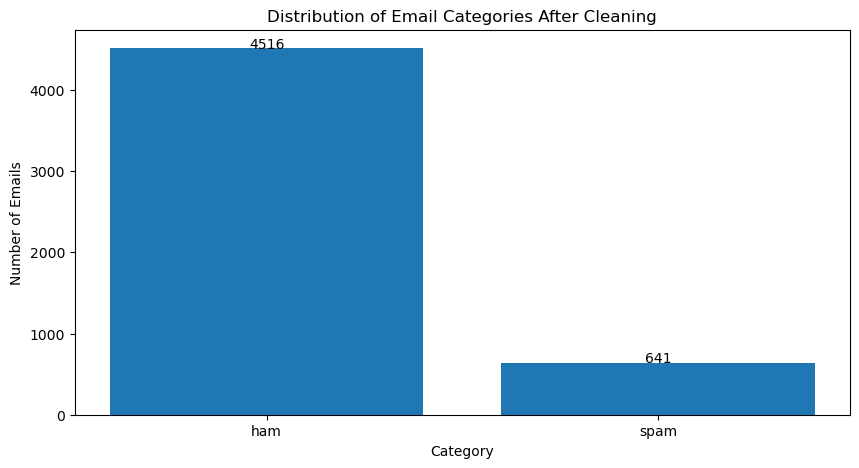

Spam percentage: 12.43%
Ham percentage: 87.57%


In [10]:
plt.figure(figsize=(10, 5))
class_counts = df['Category'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.title('Distribution of Email Categories After Cleaning')
plt.xlabel('Category')
plt.ylabel('Number of Emails')
for i, v in enumerate(class_counts.values):
    plt.text(i, v, str(v), ha='center')
plt.show()

spam_percent = (class_counts['spam'] / len(df)) * 100
ham_percent = (class_counts['ham'] / len(df)) * 100
print(f"Spam percentage: {spam_percent:.2f}%")
print(f"Ham percentage: {ham_percent:.2f}%")

### Data Cleaning Summary

The following cleaning steps were performed on the dataset:

1. **Duplicate Removal**
   - Found and removed 415 duplicate entries
   - Reduced dataset from 5,572 to 5,157 samples
   - Rationale: Duplicates could bias our model and leak information between train/test sets

2. **Text Cleaning**
   - Converted all text to lowercase for consistency
   - Removed extra whitespace to standardize formatting
   - Created 'Message_Clean' column to preserve original data
   - Rationale: Standardization helps ensure consistent feature extraction

**Key Findings**
- Final dataset contains 5,157 unique emails
- Class distribution:
  * Ham: 87.57%
  * Spam: 12.43%
- Notable class imbalance will need to be addressed during modeling

**Analysis Strategy**

Based on our cleaning results, we will need to:
1. Use text vectorization techniques on our cleaned messages
2. Consider techniques to handle class imbalance during model training
3. Ensure our train/test split preserves the class distribution

## Exploratory Data Analysis

### Basic Text Analysis

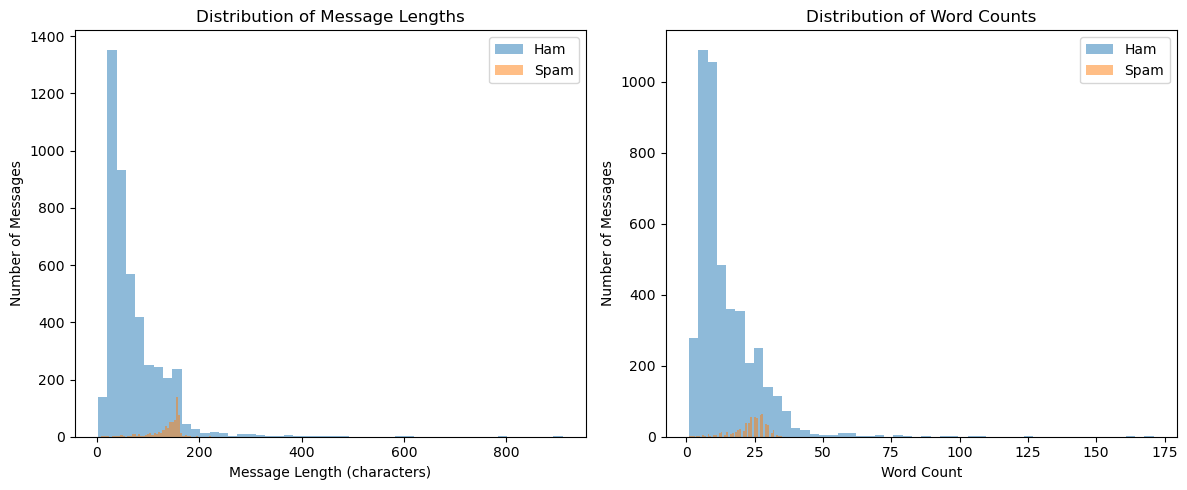


Summary Statistics:

Message Length:
           count        mean        std  min    25%    50%    75%    max
Category                                                                
ham       4516.0   70.779894  56.590842  2.0   34.0   53.0   91.0  910.0
spam       641.0  137.118565  30.399707  7.0  130.0  148.0  157.0  223.0

Word Count:
           count       mean        std  min   25%   50%   75%    max
Category                                                            
ham       4516.0  14.239814  11.179471  1.0   7.0  11.0  19.0  171.0
spam       641.0  23.659906   6.038659  1.0  21.0  25.0  28.0   35.0


In [14]:
df['length'] = df['Message_Clean'].str.len()
df['word_count'] = df['Message_Clean'].str.split().str.len()

plt.figure(figsize=(12, 5))

# plot 1: message length distribution
plt.subplot(1, 2, 1)
plt.hist(df[df['Category']=='ham']['length'], alpha=0.5, label='Ham', bins=50)
plt.hist(df[df['Category']=='spam']['length'], alpha=0.5, label='Spam', bins=50)
plt.xlabel('Message Length (characters)')
plt.ylabel('Number of Messages')
plt.title('Distribution of Message Lengths')
plt.legend()

# plot 2: word count distribution
plt.subplot(1, 2, 2)
plt.hist(df[df['Category']=='ham']['word_count'], alpha=0.5, label='Ham', bins=50)
plt.hist(df[df['Category']=='spam']['word_count'], alpha=0.5, label='Spam', bins=50)
plt.xlabel('Word Count')
plt.ylabel('Number of Messages')
plt.title('Distribution of Word Counts')
plt.legend()

plt.tight_layout()
plt.show()

print("\nSummary Statistics:")
print("\nMessage Length:")
print(df.groupby('Category')['length'].describe())
print("\nWord Count:")
print(df.groupby('Category')['word_count'].describe())

### Initial Text Analysis Findings

The analysis of message lengths and word counts reveals a pretty clear difference between spam and ham messages.

1. **Message Length Characteristics**
   - Spam messages tend to be longer (mean: 137 characters vs 71 for ham)
   - Spam messages show less variation in length (std: 30.4 vs 56.6 for ham)
   - Ham messages have a wider range: 2-910 characters
   - Spam messages are more concentrated: 7-223 characters

2. **Word Count Patterns**
   - Spam messages typically contain more words (mean: 24 words vs 14 for ham)
   - Spam shows more consistent word counts (std: 6.0 vs 11.2 for ham)
   - Ham messages range from 1-171 words
   - Spam messages are tightly clustered between 21-28 words (25-75 percentile)

These findings suggest that spam messages tend to be more uniform in their structure, possibly due to automated generation or template usage. This could be a useful feature for our classification models.


### Word Frequency Analysis

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/austintownsend/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


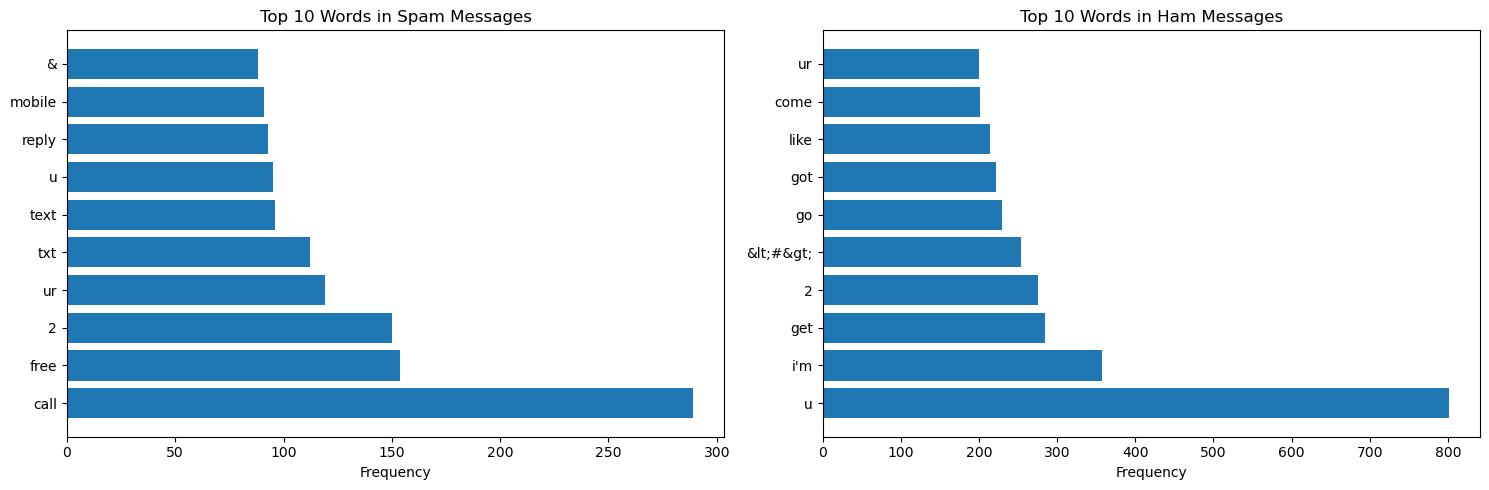


Most common words in spam messages:
call: 289
free: 154
2: 150
ur: 119
txt: 112
text: 96
u: 95
reply: 93
mobile: 91
&: 88

Most common words in ham messages:
u: 801
i'm: 358
get: 285
2: 276
&lt;#&gt;: 254
go: 230
got: 222
like: 214
come: 202
ur: 200


In [15]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def get_word_freq(texts):
    words = ' '.join(texts).split()
    # remove common English stopwords
    stops = set(stopwords.words('english'))
    words = [word for word in words if word not in stops]
    return Counter(words).most_common(10)

# frequencies for each category
spam_freq = get_word_freq(df[df['Category'] == 'spam']['Message_Clean'])
ham_freq = get_word_freq(df[df['Category'] == 'ham']['Message_Clean'])

plt.figure(figsize=(15, 5))

# spam frequencies
plt.subplot(1, 2, 1)
words, counts = zip(*spam_freq)
plt.barh(words, counts)
plt.title('Top 10 Words in Spam Messages')
plt.xlabel('Frequency')

# ham frequencies
plt.subplot(1, 2, 2)
words, counts = zip(*ham_freq)
plt.barh(words, counts)
plt.title('Top 10 Words in Ham Messages')
plt.xlabel('Frequency')

plt.tight_layout()
plt.show()

print("\nMost common words in spam messages:")
for word, count in spam_freq:
    print(f"{word}: {count}")

print("\nMost common words in ham messages:")
for word, count in ham_freq:
    print(f"{word}: {count}")

### Word Frequency Analysis Results

The visualization and frequency data reveal distinct patterns between spam and legitimate messages, which I believe will help in our classification models.

1. **Spam Message Characteristics**
   - Terms focused on prompting user action/response:
     * "call" (289 occurrences) is overwhelmingly frequent, suggesting attempts to get recipients on the phone
     * "free" (154 occurrences) used as a lure
     * Multiple variations of response requests: "txt", "text", "reply"
   - Focus on mobile communication ("mobile", "txt", "ur") suggests attempts to move conversation to phone
   - The urgency and enticement patterns ("free", "call", "reply") are typical of scam attempts
   - These patterns align with common social engineering tactics to get recipients to take action


2. **Ham (Legitimate) Message Characteristics**
   - Natural conversation patterns:
     * "u" appears most frequently (801 occurrences)
     * Casual language: "i'm", "ur", "like", "got"
     * Context-appropriate actions: "go", "come", "get"
   - Language suggests existing relationships and normal daily activities
   - No pressure or urgency in the commonly used words


**Key Insights for Classification**
   - Words attempting to prompt immediate action are strong spam indicators
   - Presence of enticement terms ("free") combined with action requests raises red flags
   - Casual, relationship-based language suggests legitimate messages
   - The frequency patterns of certain words could help identify potentially malicious messages

This analysis reveals how spam messages often employ social engineering tactics through their word choice, while legitimate messages show more natural conversation patterns.
